FRE 6971 Homework 2 by Yidi Wang
4/11/2018
1. Definitions: (1) Sample1 : 1/2/2012 to 12/31/2015
                (2) WFLY: 5Y*w1 - 7Y + 10Y*w2, weights = (w1,-1,w2)
2. Build a Jupyter Notebook to do the following:
    a. Download a panel of CMT rates into pandas dataframe & remove '1M' column from the dataset.
    b. Perform PCA on the dataset using Sample1.
    c. Use this PCA model to analyze the CMT curve move on the Election Day: 11/8/2016 to 11/9/2016.
           i. Plot CMT curve move vs the move explained by the first PCA factor, first 2 PCA factors,
              first 3 factors.
    d. Compute weights of the WFLY to make sure that WFLY does not have PCA1, 2 risk exposure in Sample1.
       Let's call this combination WFLY1.
    e. Choose weights of the WFLY from cointegration analysis (weights correspond to the best
       conintegrated vector). Let's call this combination WFLY2.
           i. Use Chou-Ng estimation procedure or Box-Tiao.
3. Compute Half-Life & ADF statistic for WFLY1, WFLY2 using Sample1, compare results
    a. Note that you are using time series of levels, not daily differences.
4. Repeat Step3 out-of-sample: using 3m, 6m, 12m out of sample periods.
    a. How do out-of-sample results compare across periods and combinations

In [1]:
# 1 Definitions.
# Try to construct the standard datasets.
# I prepare two datasets, sample1 from 1/2/2012 to 12/31/2015, and the original data. 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("D:\\data.csv", index_col=0)
sample = data.iloc[5506:6506]
sample1 = sample.set_index('Date')
data_original = data.set_index('Date')

In [2]:
print("The sample1 data:")
print(sample1.head(1),sample1.tail(1))
print("\nThe original data:")
print(data_original.head(1),data_original.tail(1))

The sample1 data:
                     3-Month  6-Month  1-Year  2-Year  3-Year  5-Year  7-Year  \
Date                                                                            
2012-01-03T00:00:00     0.02     0.06    0.12    0.27     0.4    0.89    1.41   

                     10-Year  20-Year  30-Year  
Date                                            
2012-01-03T00:00:00     1.97     2.67     2.98                        3-Month  6-Month  1-Year  2-Year  3-Year  5-Year  7-Year  \
Date                                                                            
2015-12-30T00:00:00     0.21     0.47    0.64    1.08    1.36     1.8    2.14   

                     10-Year  20-Year  30-Year  
Date                                            
2015-12-30T00:00:00     2.31     2.69     3.04  

The original data:
                     3-Month  6-Month  1-Year  2-Year  3-Year  5-Year  7-Year  \
Date                                                                            
1990-01-02T00:00:0

In [3]:
# 2. Build a Jupyter Notebook to do the following.
# a. Download a panel of CMT rates into pandas dataframe and remove '1M' column from the dataset.
sample1_ret = sample1.diff(periods = 1).dropna()
print(sample1_ret.head(1), sample1_ret.tail(1))

                     3-Month  6-Month  1-Year  2-Year  3-Year  5-Year  7-Year  \
Date                                                                            
2012-01-04T00:00:00      0.0      0.0     0.0   -0.02     0.0     0.0    0.02   

                     10-Year  20-Year  30-Year  
Date                                            
2012-01-04T00:00:00     0.03     0.04     0.05                        3-Month  6-Month  1-Year  2-Year  3-Year  5-Year  7-Year  \
Date                                                                            
2015-12-30T00:00:00    -0.02    -0.03   -0.03   -0.01   -0.02   -0.01    0.02   

                     10-Year  20-Year  30-Year  
Date                                            
2015-12-30T00:00:00    -0.01      0.0      0.0  


In [4]:
# b. Perform PCA on the dataset using Sample1.
# Perform PCA for both the original data and difference data.
from sklearn.decomposition import PCA
pca_ret = PCA(n_components = 10)
pca_ret.fit(sample1_ret)
f_ret = pca_ret.components_
var_ratio_ret = np.cumsum(np.round(pca_ret.explained_variance_ratio_, decimals = 4))
print('% variance explained for the dif sample1 data: ')
print(var_ratio_ret)

pca = PCA(n_components = 10)
pca.fit(sample1)
f = pca.components_
var_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4))
print('% variance explained for the sample1 data')
print(var_ratio)

% variance explained for the dif sample1 data: 
[ 0.866   0.9432  0.9614  0.9737  0.9812  0.9873  0.9923  0.9953  0.9977
  0.9999]
% variance explained for the sample1 data
[ 0.7332  0.9767  0.9965  0.9983  0.9991  0.9994  0.9996  0.9997  0.9998
  0.9999]


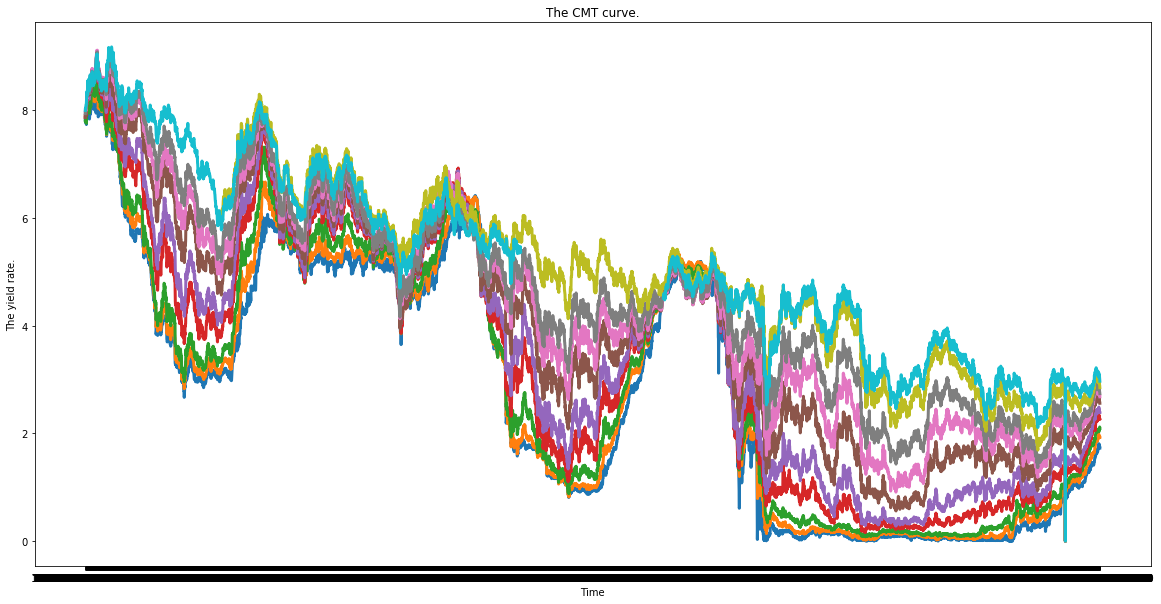

In [5]:
# c. Use this PCA model to analyze the CMT curve move on the Election Day: 11/8/2016 to 11/9/2016.
# i. Plot CMT curve move.
plt.figure(figsize = (20, 10))
plt.plot(data_original[['3-Month','6-Month','1-Year','2-Year','3-Year',
                        '5-Year','7-Year','10-Year','20-Year','30-Year']],linewidth = 3)
plt.title('The CMT curve.')
plt.xlabel('Time')
plt.ylabel('The yield rate.')
plt.show()

In [6]:
# c. Use the PCA model for the data_ret.
data_original_ret = data_original.diff(periods = 1).dropna()
c_ret = data_original_ret.cov()
val_ret, vec_ret = np.linalg.eig(c_ret)
tr_ret = sum(val_ret)
var_ratio_custom_ret = np.cumsum(np.round(val_ret / tr_ret, decimals = 4))
print(var_ratio_custom_ret)

# c. Use the PCA model for the data.
c = data_original.cov()
val, vec = np.linalg.eig(c)
tr = sum(val)
var_ratio_custom = np.cumsum(np.round(val / tr, decimals = 4))
print(var_ratio_custom)

[ 0.8158  0.9199  0.9666  0.9804  0.9874  0.992   0.9948  0.9968  0.9982
  0.9999]
[ 0.9554  0.9916  1.0042  0.9981  0.9997  0.9999  1.      1.      1.      1.    ]


Text(0.5,1,'pca1,pca2 and pca3 of data_ret.')

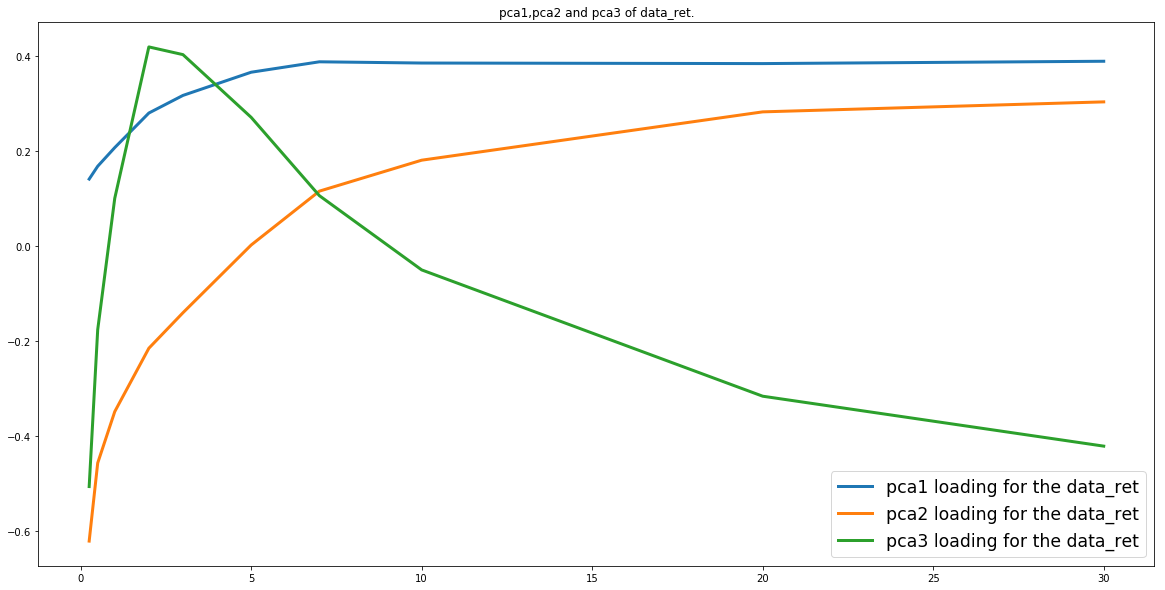

In [7]:
# Plot the pca1, pca2, and pca3 loading for the data_ret.
term = [3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]
plt.figure(figsize = (20, 10))
plt.plot(term,vec_ret[:,0], label = 'pca1 loading for the data_ret', linewidth = 3)
plt.plot(term,vec_ret[:,1], label = 'pca2 loading for the data_ret', linewidth = 3)
plt.plot(term,vec_ret[:,2], label = 'pca3 loading for the data_ret', linewidth = 3)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.title('pca1,pca2 and pca3 of data_ret.')

Text(0.5,1,'pca1,pca2, and pca3 of data.')

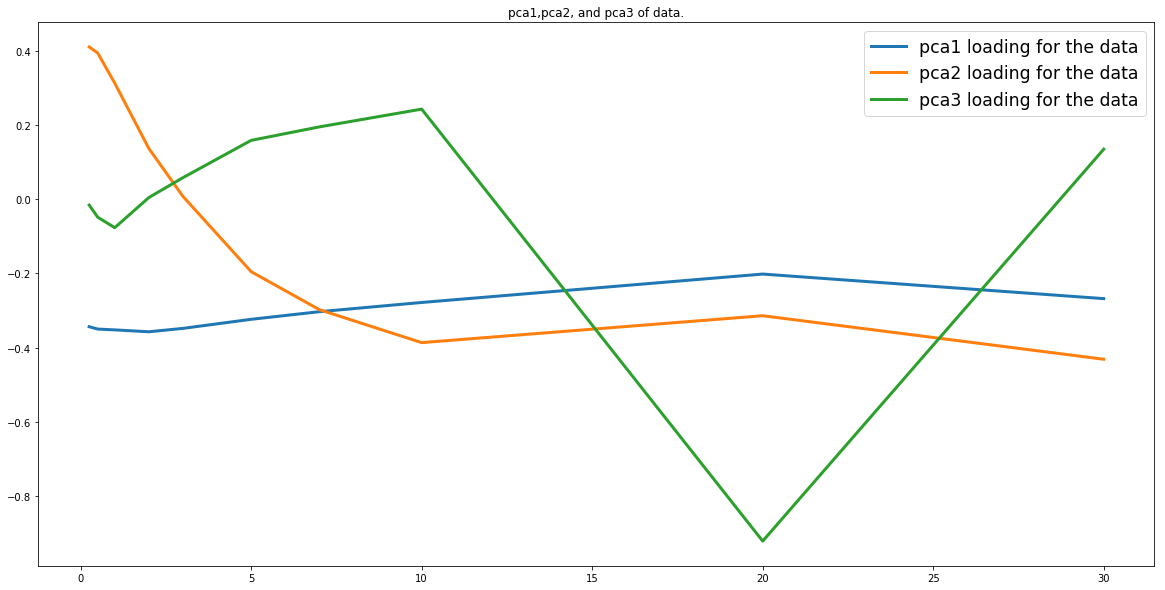

In [8]:
# Plot the pca1, pca2, and pca3 loading for the data.
term = [3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]
plt.figure(figsize = (20, 10))
plt.plot(term,vec[:,0], label = 'pca1 loading for the data', linewidth = 3)
plt.plot(term,vec[:,1], label = 'pca2 loading for the data', linewidth = 3)
plt.plot(term,vec[:,2], label = 'pca3 loading for the data', linewidth = 3)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.title('pca1,pca2, and pca3 of data.')

E:\Python\lib\site-packages\matplotlib\legend.py:638: UserWarning: Unrecognized location "lower rigth". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


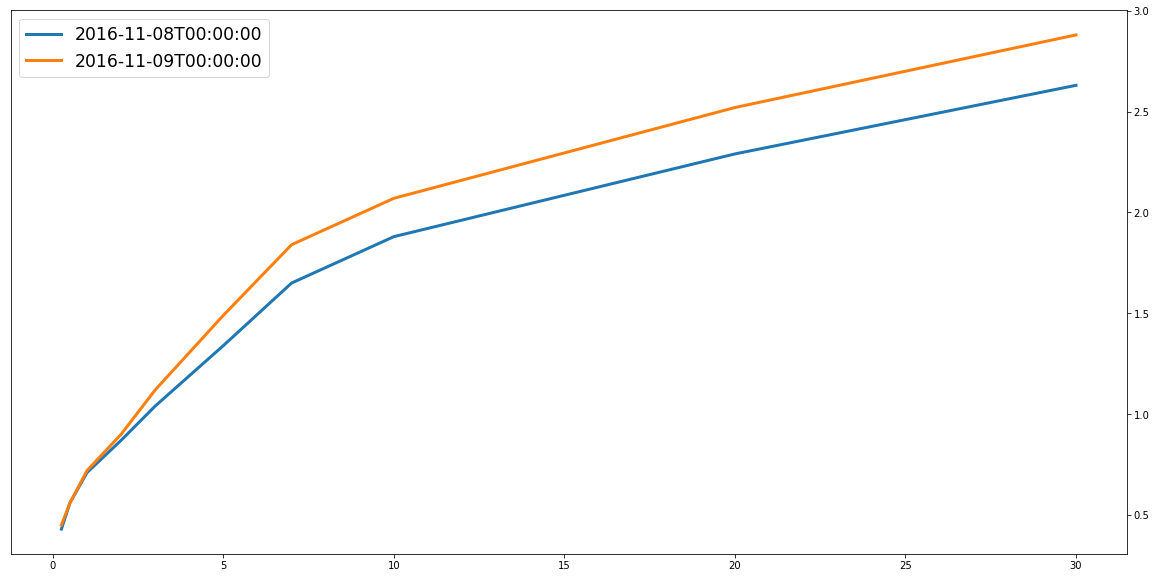

In [9]:
def plotme(dts, frame):
    f = plt.figure(figsize = (20, 10))
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    x = [3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]
    crvs = [frame.loc[dt] for dt in dts]
    plots = [plt.plot(x, crv.values, label = dt, linewidth = 3) for crv, dt in zip(crvs, dts)]
    plt.legend(loc = 'lower rigth', fontsize = 'xx-large')
    plt.show()
    
dts = ['2016-11-08T00:00:00', '2016-11-09T00:00:00']
plotme(dts, data_original)    

In [10]:
# ii. Explain your calculations and results.
print(data_original_ret.columns.tolist(), vec_ret[:,0])
print(data_original_ret.columns.tolist(), vec_ret[:,1])
print(data_original_ret.columns.tolist(), vec_ret[:,2])

print(data_original.columns.tolist(), vec[:,0])
print(data_original.columns.tolist(), vec[:,1])
print(data_original.columns.tolist(), vec[:,2])

['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [ 0.14074152  0.16773584  0.20698702  0.27974586  0.31682624  0.36564904
  0.3875876   0.38499578  0.38382544  0.38872766]
['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [-0.62128705 -0.4569139  -0.3487475  -0.21534792 -0.14062652  0.00191342
  0.11531019  0.18047947  0.2822017   0.30322597]
['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [-0.50650164 -0.17634624  0.10030039  0.4189287   0.40269204  0.27065553
  0.10581556 -0.05046653 -0.31630596 -0.42141204]
['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [-0.34363099 -0.34996466 -0.35215641 -0.35722846 -0.34809622 -0.32365406
 -0.30315778 -0.27831017 -0.20181723 -0.26795868]
['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', 

In [11]:
# d. Compute weights of the WFLY to make sure that WFLY does not have PCA1,2 risk exposure in Sample1.
c_sample1 = sample1.cov()
val_sample1, vec_sample1 = np.linalg.eig(c_sample1)
tr_sample1 = sum(val_sample1)
var_ratio_sample1 = np.cumsum(np.round(val_sample1 / tr_sample1, decimals = 4))
print(var_ratio_sample1)

c_sample1_ret = sample1_ret.cov()
val_sample1_ret, vec_sample1_ret = np.linalg.eig(c_sample1_ret)
tr_sample1_ret = sum(val_sample1_ret)
var_ratio_sample1_ret = np.cumsum(np.round(val_sample1_ret / tr_sample1_ret, decimals = 4))
print(var_ratio_sample1_ret)

[ 0.7332  0.9767  0.9965  0.9983  0.9991  0.9994  0.9996  0.9997  0.9998
  0.9999]
[ 0.866   0.9432  0.9614  0.9737  0.9812  0.9873  0.9923  0.9953  0.9975
  0.9999]


In [12]:
print(sample1.columns.tolist(), vec_sample1[:,0])
print(sample1.columns.tolist(), vec_sample1[:,1])

['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [-0.01772877 -0.01960933 -0.01039663  0.08286741  0.22123701  0.428087
  0.49814324  0.46030264  0.41295186  0.35995462]
['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [ 0.00936026 -0.05634271 -0.14698062 -0.33988228 -0.46826417 -0.39877806
 -0.21408868  0.11506476  0.43844848  0.47959193]


In [13]:
print(sample1_ret.columns.tolist(), vec_sample1_ret[:,0])
print(sample1_ret.columns.tolist(), vec_sample1_ret[:,1])

['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [ 0.01192096  0.01712702  0.04432965  0.16295201  0.25335924  0.38584075
  0.44672618  0.43905623  0.436523    0.41844366]
['3-Month', '6-Month', '1-Year', '2-Year', '3-Year', '5-Year', '7-Year', '10-Year', '20-Year', '30-Year'] [-0.03362952 -0.07233963 -0.13606705 -0.41831275 -0.5014449  -0.37708859
 -0.14604436  0.10439566  0.39353065  0.46840117]


In [14]:
pca_w = np.array([[0.428087, 0.46030264], [-0.39877806, 0.11506476]])
pca_7y = np.array([0.49814324, -0.21408868])
print(np.linalg.solve(pca_w, pca_7y))

[ 0.66947332  0.45958983]


In [15]:
pca_w_ret = np.array([[0.38584075, 0.43905623], [-0.37708859, 0.10439566]])
pca_7y_ret = np.array([0.44672618, -0.14604436])
print(np.linalg.solve(pca_w_ret, pca_7y_ret))

[ 0.53806958  0.54461592]


In [16]:
# e. Choose weights of the WFLY from cointegration analysis.
# i. Use Chou-Ng estimation procedure.
import statsmodels.api as sm

def CCA_Chou_Ng(data_set):
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    X = df_lag.as_matrix()
    X_I = sm.add_constant(X)
    Y = df.as_matrix()
    l1 = sm.OLS(Y, X_I).fit()
    B = l1.params[1:(n+1)]
    
    Y_I = sm.add_constant(X)
    l2 = sm.OLS(X, Y_I).fit()
    A = l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    return eig_val, eig_vec, C

legs = ['2-Year', '10-Year']
belly = '5-Year'
flylist = [legs[0], belly, legs[1]]
fly = sample1.loc['2012-01-03T00:00:00':'2015-12-30T00:00:00',flylist]
df1 = fly
n = len(df1.columns)
val, vec, C = CCA_Chou_Ng(df1)
vec = pd.DataFrame(vec)
vec = vec.rename(columns = lambda x: n-x-1, inplace = False)
print(vec)
w = vec[2].values
w_cca_cn = [-w[0]/w[1], -w[2]/w[1]]
print(w_cca_cn)

E:\Python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                      2                                 1  \
0  (-0.700744945277+0j)  (0.263386663682-0.394092466552j)   
1   (0.537566881239+0j)              (-0.744160734576+0j)   
2  (-0.469018517612+0j)   (0.435824770622+0.17776434859j)   

                                  0  
0  (0.263386663682+0.394092466552j)  
1              (-0.744160734576-0j)  
2   (0.435824770622-0.17776434859j)  
[(1.3035493251778474-0j), (0.87248402753258025-0j)]


In [17]:
legs = ['2-Year', '10-Year']
belly = '5-Year'
flylist = [legs[0], belly, legs[1]]
fly = sample1_ret.loc['2012-01-03T00:00:00':'2015-12-30T00:00:00',flylist]
df1 = fly
n = len(df1.columns)
val, vec, C = CCA_Chou_Ng(df1)
vec = pd.DataFrame(vec)
vec = vec.rename(columns = lambda x: n-x-1, inplace = False)
print(vec)
w = vec[2].values
w_cca_cn = [-w[0]/w[1], -w[2]/w[1]]
print(w_cca_cn)

          2         1         0
0  0.841009 -0.153183 -0.148471
1 -0.502948 -0.986823 -0.424460
2  0.199366  0.052111  0.893191
[1.6721588439085835, 0.39639517135404684]


In [18]:
# 3. Compute Half-Life & ADF statistic for WFLY1, WFLY2 using Sample1.
# PCA
sample1['Portfolio'] = 0.66947332 * sample1['5-Year'] - sample1['7-Year'] + 0.45958983 * sample1['10-Year']
sample1['Portfolio'].describe()

count    1000.000000
mean        0.121053
std         0.015831
min         0.066049
25%         0.111352
50%         0.121839
75%         0.132104
max         0.163971
Name: Portfolio, dtype: float64

In [19]:
sample1_ret['Portfolio'] = 0.53806958 * sample1_ret['5-Year'] - sample1_ret['7-Year'] + 0.54461592 * sample1_ret['10-Year']
sample1_ret['Portfolio'].describe()

count    999.000000
mean      -0.000055
std        0.007144
min       -0.030827
25%       -0.004935
50%        0.000000
75%        0.004554
max        0.024619
Name: Portfolio, dtype: float64

In [20]:
# So difference method is much better than the original data.
sample1_ret['Portfolio_CCA'] = 1.6721588439085835 * sample1_ret['5-Year'] - sample1_ret['7-Year'] + 0.39639517135404684 * sample1_ret['10-Year']
sample1_ret['Portfolio_CCA'].describe()

count    999.000000
mean       0.000927
std        0.043270
min       -0.175097
25%       -0.025768
50%       -0.000686
75%        0.027407
max        0.207350
Name: Portfolio_CCA, dtype: float64

In [ ]:
# PCA is much better than CCA method.